In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from scipy.stats import lognorm
import statsmodels.api as sm
import tqdm as tqdm


# Data prep

In [32]:
data = pd.read_csv('wdbc.data', names=['ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean','Area_mean','Smooth_mean',
'Compactness_mean','Concavity_mean','Concave_points_mean','Symmetry_men','FD_mean', 'Radius_se', 'Texture_se','Perimeter_se','Area_se',
'Smooth_se','Compactness_se','Concavity_se','Concave_points_se','Symmetry_se','FD_se','Radius_w','Texture_w','Perimeter_w','Area_w',
'Smooth_w','Compactness_w','Concavity_w','Concave_points_w','Symmetry_w','FD_w'])

y = data.iloc[:,1].values
X = data.iloc[:, 2:32].values
data = pd.DataFrame(data)
data.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smooth_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_w,Texture_w,Perimeter_w,Area_w,Smooth_w,Compactness_w,Concavity_w,Concave_points_w,Symmetry_w,FD_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
# No missing values
data.isnull()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smooth_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_w,Texture_w,Perimeter_w,Area_w,Smooth_w,Compactness_w,Concavity_w,Concave_points_w,Symmetry_w,FD_w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


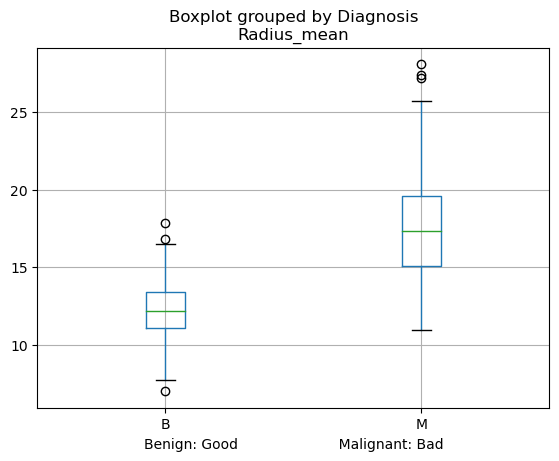

In [34]:
data.boxplot(column='Radius_mean', by='Diagnosis')
plt.xlabel('Benign: Good                       Malignant: Bad')
plt.show()

# Plots, normal?
No they are not, there log transform

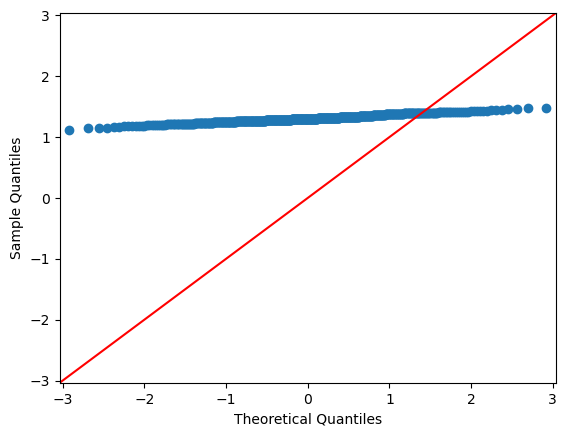

ShapiroResult(statistic=0.9907780885696411, pvalue=0.0012674089521169662)


In [31]:
# Doing histograms and logtransforming if not normal dist
from scipy.stats import shapiro 

# QQ plot
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['Radius_mean'], line='45')
plt.show()

print(shapiro(data['Radius_mean']))

In [44]:
# Log transform

numeric_df = data.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
y = data.iloc[:,1].values
X = data.iloc[:, 2:32].values

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Baseline

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
voteM = 0
voteB = 0
for i in y_train:
    if i == 'M':
        voteM += 1
    else:
        voteB += 1
if voteB > voteM:
    print('Majority voting on B: Benign')
else:
    print('Majority voting on M: Malignant')

# Initiate outer fold
cv_outer = KFold(5,shuffle=True)
scores = []
# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in cv_outer.split(X):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    voteM = 0
    voteB = 0
    for i in y_train:
        if i == 'M':
            voteM += 1
        else:
            voteB += 1
    if voteB > voteM:
        print('Majority voting on B: Benign')
    else:
        print('Majority voting on M: Malignant')
    scores.append(np.max([voteB,voteM])/(voteB+voteM))

# Summarize best results
print(('Accuracy: %.3f (std: %.3f)') % (np.mean(scores), np.std(scores)))
base_scores = scores
print(f'Baseline accuracy scores: {base_scores}')

Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Majority voting on B: Benign
Accuracy: 0.628 (std: 0.007)
Baseline accuracy scores: [0.6244131455399061, 0.6338028169014085, 0.6244131455399061, 0.6384976525821596, 0.6197183098591549]


# Model 1: Random Forest

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [66]:
# Initiate outer fold
cv_outer = KFold(5,shuffle=True)

# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in cv_outer.split(X):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    model = RandomForestClassifier()

    # Create search space
    space = dict()
    space['n_estimators'] = [10,100,500] # 3 folds in inner loop
    space['max_features'] = [2,4,6] # 3 folds in inner loop
    # Defining search
    search = GridSearchCV(model, space, scoring = 'accuracy', cv = cv_inner, refit = True)
    result = search.fit(X_train,y_train)

    # Cross val score select the best model and best parameters for each outer loop
    scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# Summarize best results
print(('Accuracy: %.3f (%.3f)') % (np.mean(scores), np.std(scores)))
forest_scores = scores
forest_search = search
forest_result = result
print(f'Random forest accuracy scores: {forest_scores}')
print(f'Optimal Parameters: {search.best_params_}')

Accuracy: 0.956 (0.012)
Random forest accuracy scores: [0.96491228 0.97368421 0.93859649 0.95614035 0.94690265]


# Model 2: Logistic Regression

In [67]:
# Initiate outer fold
cv_outer = KFold(5,shuffle=True)
scores = []
# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in cv_outer.split(X):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    model = LogisticRegression()

    result = model.fit(X_train,y_train)
    y_pred = result.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

# Summarize best results
print(('Accuracy: %.3f (std: %.3f)') % (np.mean(scores), np.std(scores)))
logreg_scores = scores
logreg_search = search
logreg_result = result
logreg_weights = result.coef_
print(f'Log Reg accuracy scores: {logreg_scores}')

Accuracy: 0.982 (std: 0.007)
Log Reg accuracy scores: [0.9790209790209791, 0.972027972027972, 0.986013986013986, 0.993006993006993, 0.9790209790209791]


# Model 3: KNN

In [68]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
import tqdm

# Initiate outer fold
cv_outer = KFold(5,shuffle=True)

# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in tqdm.tqdm(cv_outer.split(X)):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    model = KNeighborsClassifier()

    # Create search space
    space = dict()
    space['n_neighbors'] = [4,5,6]
    # Defining search
    search = GridSearchCV(model, space, scoring = 'accuracy', cv = cv_inner, refit = True)
    result = search.fit(X_train,y_train)

    # Cross val score select the best model and best parameters for each outer loop
    scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# Summarize best results
print(('Accuracy: %.3f (%.3f)') % (np.mean(scores), np.std(scores)))
KNN_scores = scores
KNN_search = search
KNN_result = result
print(f'KNN accuracy scores: {KNN_scores}')
print(f'The optimal number of neighbors: {search.best_params_}')

5it [00:00,  5.05it/s]

Accuracy: 0.933 (0.009)
KNN accuracy scores: [0.92982456 0.92982456 0.94736842 0.93859649 0.92035398]
The optimal number of neighbors: {'n_neighbors': 6}


# Model 4: Classification tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
import tqdm
# Initiate outer fold
cv_outer = KFold(5,shuffle=True)

# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in tqdm.tqdm(cv_outer.split(X)):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv, inner loop is to choose parameters, outer is to chose models with the already selected best parameyers
    cv_inner = KFold(n_splits=3, shuffle=True)
    # Define the model
    model = DecisionTreeClassifier()

    # Create search space
    space = dict()
    space['criterion'] = ['gini', 'entropy'] # 3 folds in inner loop
    space['splitter'] = ['best','random'] # 3 folds in inner loop
    # Defining search
    search = GridSearchCV(model, space, scoring = 'accuracy', cv = cv_inner, refit = True)
    result = search.fit(X_train,y_train)

    # Cross val score select the best model and best parameters for each outer loop
    scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# Summarize best results
print(('Accuracy: %.3f (%.3f)') % (np.mean(scores), np.std(scores)))
tree_scores = scores
tree_search = search
tree_result = result
print(f'Decision Tree accuracy scores: {tree_scores}')

5it [00:00,  9.25it/s]

Accuracy: 0.931 (0.015)
Decision Tree accuracy scores: [0.95614035 0.92105263 0.92982456 0.93859649 0.91150442]


# Model 5: Artificial Neural Network

In [70]:

import sklearn.neural_network as nn

# Initiate outer fold
cv_outer = KFold(5,shuffle=True)

# Enumerate the 5 folds
outer_res = []
for train_ix, test_ix in tqdm.tqdm(cv_outer.split(X)):
   # Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Start the cv, inner loop is to choose parameters, outer is to chose models with the already selected best parameyers
    cv_inner = KFold(n_splits=10, shuffle=True)
    # Define the model
    model = nn.MLPClassifier(max_iter = 5000, hidden_layer_sizes = 5, activation = 'relu')

    # Create search space
    space = dict()
    #space['hidden_layer_sizes'] = [4,5,6,10,15,8,9] 
    #space['activation'] = ['relu', 'tanh', 'logistic'] 
    # Defining search
    search = GridSearchCV(model, space, scoring = 'accuracy', cv = cv_inner, refit = True)
    result = search.fit(X_train,y_train)

    # Cross val score select the best model and best parameters for each outer loop
    scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# Summarize best results
print(('Accuracy: %.3f (%.3f)') % (np.mean(scores), np.std(scores)))
ANN_scores = scores
ANN_search = search
ANN_result = result
print(f'Artificial Neural Network accuracy scores: {ANN_scores}')
print(f'Optimal parameters: {search.best_params_}')

5it [00:53, 10.71s/it]

Accuracy: 0.868 (0.136)
Artificial Neural Network accuracy scores: [0.59649123 0.94736842 0.93859649 0.92105263 0.9380531 ]
Optimal parameters: {}


# Evaluation

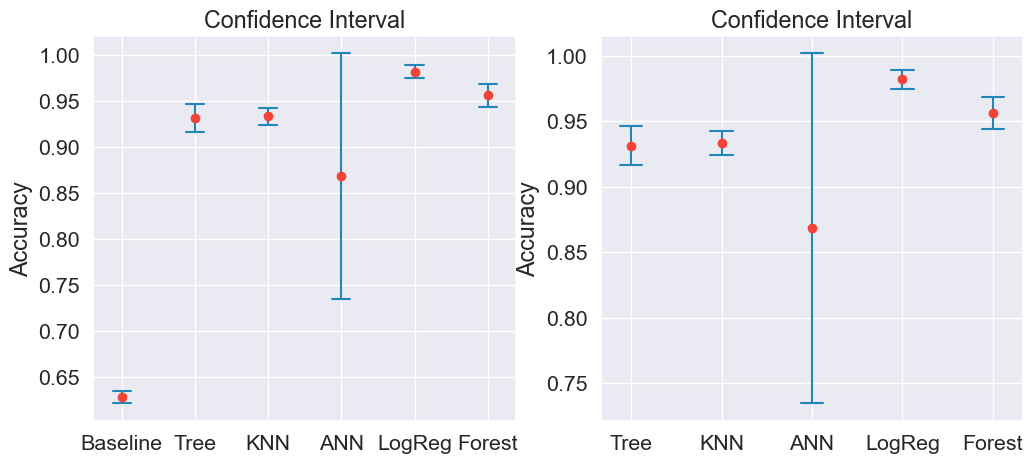

In [152]:
# plot mean og konfidensintervaller for hver model

import matplotlib.pyplot as plt
import statistics
from math import sqrt


def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks([1, 2, 3, 4, 5, 6], ['Baseline', 'Tree', 'KNN', 'ANN', 'LogReg', 'Forest'])
plt.title('Confidence Interval')
plot_confidence_interval(1, base_scores)
plot_confidence_interval(2, tree_scores)
plot_confidence_interval(3, KNN_scores)
plot_confidence_interval(4, ANN_scores)
plot_confidence_interval(5, logreg_scores)
plot_confidence_interval(6, forest_scores)
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.xticks([1, 2, 3, 4,5], ['Tree', 'KNN', 'ANN', 'LogReg', 'Forest'])
plt.title('Confidence Interval')
plot_confidence_interval(1, tree_scores)
plot_confidence_interval(2, KNN_scores)
plot_confidence_interval(3, ANN_scores)
plot_confidence_interval(4, logreg_scores)
plot_confidence_interval(5, forest_scores)
plt.ylabel('Accuracy')
plt.show()

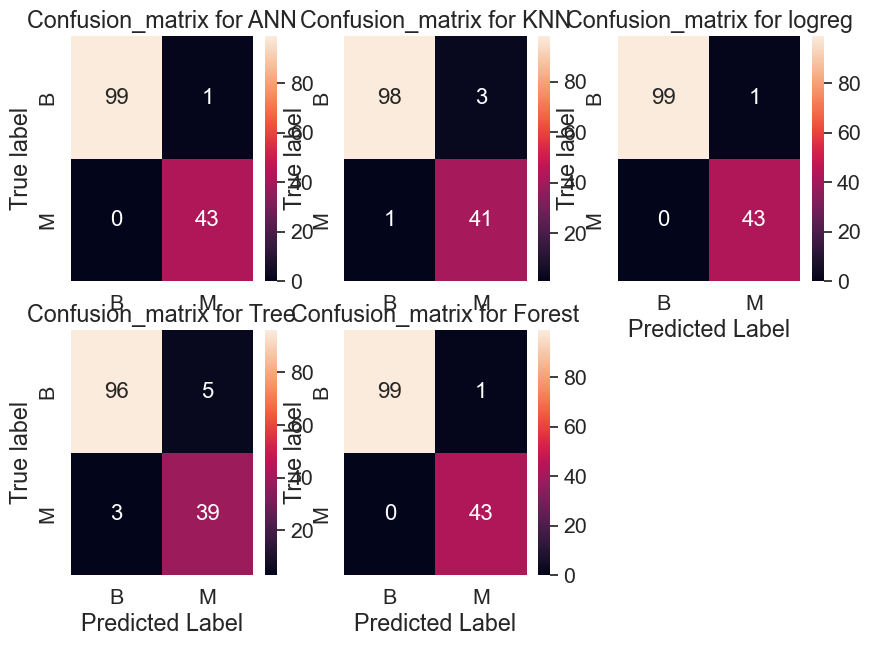

In [153]:
from sklearn.metrics import confusion_matrix
# Predicition for new data
# result.predict(X_test)
array = confusion_matrix(ANN_result.predict(X_test), y_test)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(array, ['B', 'M'], ['B', 'M'])
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('True label')
plt.title('Confusion_matrix for ANN')

array = confusion_matrix(KNN_result.predict(X_test), y_test)
df_cm = pd.DataFrame(array, ['B', 'M'], ['B', 'M'])
plt.subplot(2,3,2)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('True label')
plt.title('Confusion_matrix for KNN')

array = confusion_matrix(logreg_result.predict(X_test), y_test)
df_cm = pd.DataFrame(array, ['B', 'M'], ['B', 'M'])
plt.subplot(2,3,3)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion_matrix for logreg')

array = confusion_matrix(tree_result.predict(X_test), y_test)
df_cm = pd.DataFrame(array, ['B', 'M'], ['B', 'M'])
plt.subplot(2,3,4)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion_matrix for Tree')

array = confusion_matrix(forest_result.predict(X_test), y_test)
df_cm = pd.DataFrame(array, ['B', 'M'], ['B', 'M'])
plt.subplot(2,3,5)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion_matrix for Forest')

plt.show()

In [154]:
from scipy import stats

F,p = stats.ttest_ind(base_scores,ANN_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between baseline and ANN')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between baseline and ANN')

F,p = stats.ttest_ind(base_scores,KNN_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between baseline and KNN')
else:
    print(f'p = {round(p)}, hence there is not a significant difference in performance between baseline and KNN')

F,p = stats.ttest_ind(base_scores,logreg_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between baseline and logreg')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between baseline and logreg')

F,p = stats.ttest_ind(base_scores,tree_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between baseline and tree')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between baseline and tree')


F,p = stats.ttest_ind(base_scores,forest_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between baseline and forest')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between baseline and forest')



F,p = stats.ttest_ind(logreg_scores,ANN_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between logreg and ANN')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between logreg and ANN')

F,p = stats.ttest_ind(logreg_scores,KNN_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between logreg and KNN')
else:
    print(f'p = {round(p)}, hence there is not a significant difference in performance between logreg and KNN')

F,p = stats.ttest_ind(logreg_scores,tree_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between logreg and tree')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between logreg and tree')


F,p = stats.ttest_ind(logreg_scores,forest_scores)
if p < 0.05:
    print(f'p = {round(p,3)}, hence there is a significant difference in performance between logreg and forest')
else:
    print(f'p = {round(p,3)}, hence there is not a significant difference in performance between logreg and forest')

p = 0.008, hence there is a significant difference in performance between baseline and ANN
p = 0.0, hence there is a significant difference in performance between baseline and KNN
p = 0.0, hence there is a significant difference in performance between baseline and logreg
p = 0.0, hence there is a significant difference in performance between baseline and tree
p = 0.0, hence there is a significant difference in performance between baseline and forest
p = 0.135, hence there is not a significant difference in performance between logreg and ANN
p = 0.0, hence there is a significant difference in performance between logreg and KNN
p = 0.0, hence there is a significant difference in performance between logreg and tree
p = 0.007, hence there is a significant difference in performance between logreg and forest


# Feature selection

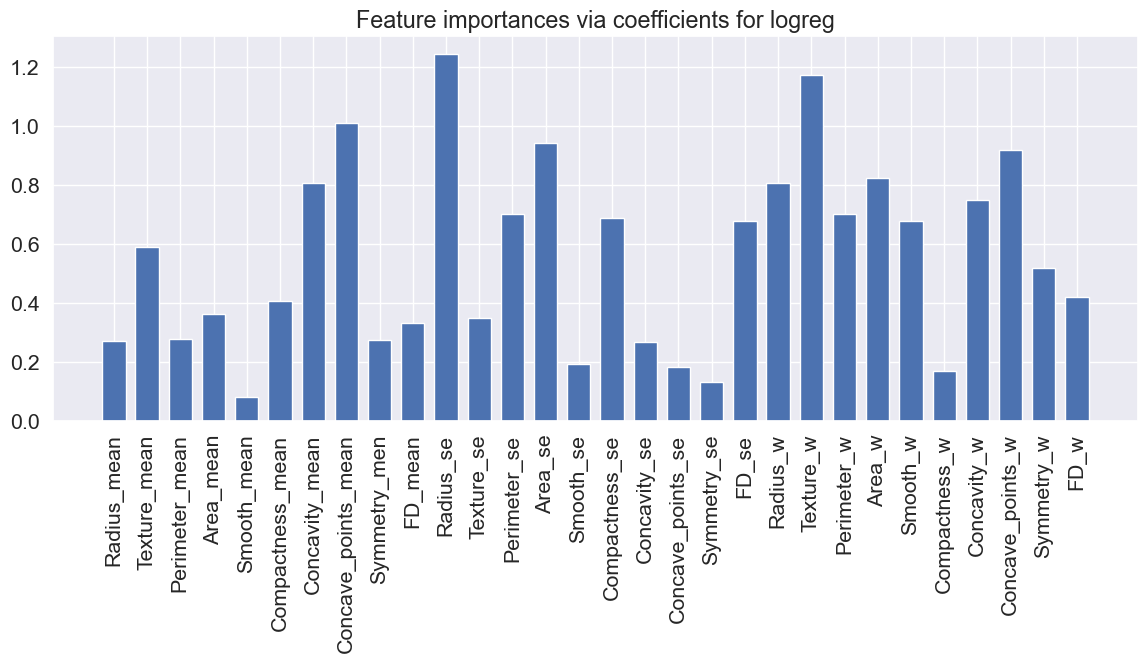

In [150]:
# Feature importance

importance = np.abs(logreg_result.coef_)[0]
names = data.columns[2:]
plt.figure(figsize=(14,5))
plt.bar(height=importance, x=names, width=0.7)
plt.title("Feature importances via coefficients for logreg")
plt.xticks(rotation = 90)
plt.show()